# Introduction

### **Introduction to the Toyota Stock Data Analysis Project**

**Context and Objectives of the Project**

This project focuses on analyzing the historical stock data of Toyota Motor Corporation, spanning over four decades (1980–2024). The goal is to derive meaningful insights about Toyota's stock performance through data exploration, statistical analysis, and visualizations. By delving into this dataset, we aim to better understand long-term market trends and uncover patterns in price movements and trading activities.

The specific objectives of the project are:  
- To study the historical performance of Toyota’s stock and identify significant trends or events.  
- To analyze trading volume and its relationship with price movements.  
- To visualize key metrics to highlight patterns of volatility and stability.  
- To provide insights into the impact of global economic conditions on Toyota's stock.  

**Dataset Source and Description**

The dataset is sourced from **Yahoo Finance**, a trusted platform for financial and stock market data. It includes daily trading records of Toyota’s stock, offering more than 11,000 observations. The dataset provides detailed information about the stock’s performance on a daily basis, including:  
- **Date**: The trading date in a standard format.  
- **Adj Close**: The adjusted closing price that accounts for stock splits and dividends.  
- **Close**: The official closing price for the trading day.  
- **High** and **Low**: The highest and lowest prices of the stock during the trading session.  
- **Open**: The price at which the stock started trading on a given day.  
- **Volume**: The total number of shares traded during the day.

**Reasons for Choosing the Dataset**

This dataset was selected for several compelling reasons:  
1. **Historical Depth**: The extensive timeframe allows for an in-depth study of Toyota's stock performance over different market cycles, including financial crises and recoveries.  
2. **Global Importance**: Toyota is a globally renowned company, making its stock performance a significant indicator of market sentiment and economic conditions.  
3. **Versatility**: The dataset supports a range of financial analyses, from trend analysis to volatility studies, without requiring additional sources.  
4. **Rich Data Composition**: The inclusion of adjusted prices, trading volume, and daily price ranges provides a comprehensive foundation for exploring market behavior.

**Key Aspects of Interest**

Some of the key areas of focus include:  
- Identifying long-term trends in stock prices and trading volumes.  
- Analyzing periods of heightened volatility, such as during economic downturns (e.g., 2008 or 2020).  
- Studying the relationship between trading volume and daily price changes.  
- Understanding the impact of significant global events on Toyota’s stock.

**Analysis Goals**

This project will involve a thorough exploration of the dataset to answer the above questions, using descriptive statistics, trend analysis, and visualizations. The findings will provide a detailed understanding of Toyota’s stock performance and offer valuable insights for financial analysis and decision-making.  

Let us now proceed with the exploration of the dataset!

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import numpy as np
import calendar



# Loading data

In [3]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Pyhton/Toyota_Data.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data exploration

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11291 non-null  object 
 1   Adj Close  11291 non-null  float64
 2   Close      11291 non-null  float64
 3   High       11291 non-null  float64
 4   Low        11291 non-null  float64
 5   Open       11291 non-null  float64
 6   Volume     11291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.6+ KB


In [5]:
data.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409


In [6]:
# Display number of missing values per column
missing_values = data.isnull().sum()
print(missing_values)


Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [7]:
# Print columns type
print(data.dtypes)
# print unique value
unique_values = data.nunique()
print(unique_values)

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object
Date         11291
Adj Close     7496
Close         5853
High          5697
Low           5685
Open          4796
Volume        5767
dtype: int64


In [8]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04
mean,63.586275,72.057776,72.478879,71.646418,67.955424,2.146604e+05
std,52.272225,51.295776,51.552662,50.976716,55.851523,3.874256e+05
min,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04
50%,50.583900,66.040001,66.650002,65.440002,66.000000,9.100000e+04
75%,104.705669,114.295002,114.895000,113.625000,114.294998,2.923000e+05
max,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07


# Data visualization

**Line Plot of Adjusted Close Price Over Time**

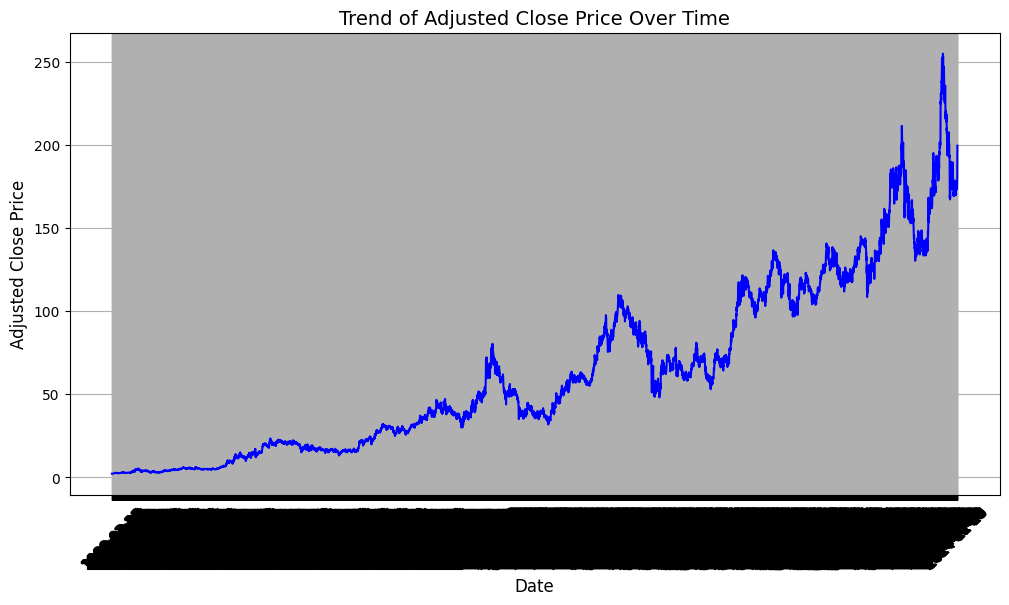

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Adj Close', color='blue')
plt.title('Trend of Adjusted Close Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Distribution of Trading Volume**

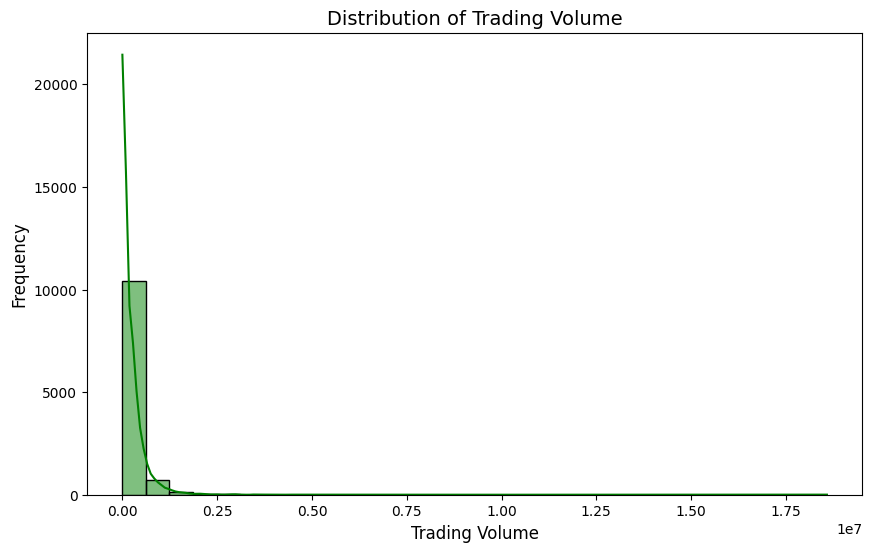

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Volume'], bins=30, kde=True, color='green')
plt.title('Distribution of Trading Volume', fontsize=14)
plt.xlabel('Trading Volume', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**Boxplot of Daily Price Ranges (High - Low)**

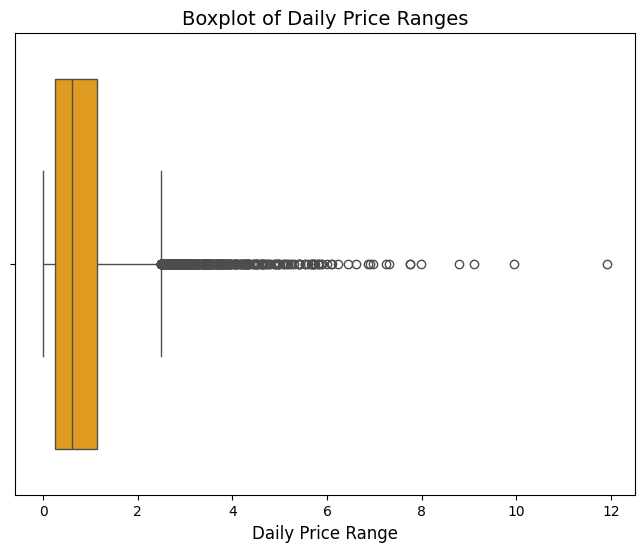

In [11]:
data['Daily Range'] =data['High'] - data['Low']

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Daily Range'], color='orange')
plt.title('Boxplot of Daily Price Ranges', fontsize=14)
plt.xlabel('Daily Price Range', fontsize=12)
plt.show()


**Heatmap of Correlations Between Numeric Variables**



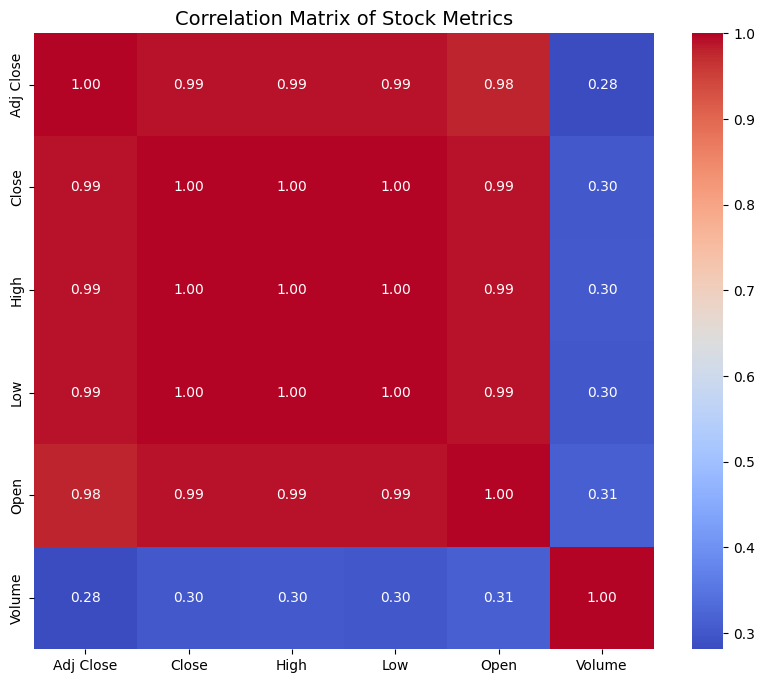

In [12]:
plt.figure(figsize=(10, 8))
corr_matrix = data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Metrics', fontsize=14)
plt.show()


**Scatter Plot of Volume vs Price Change**

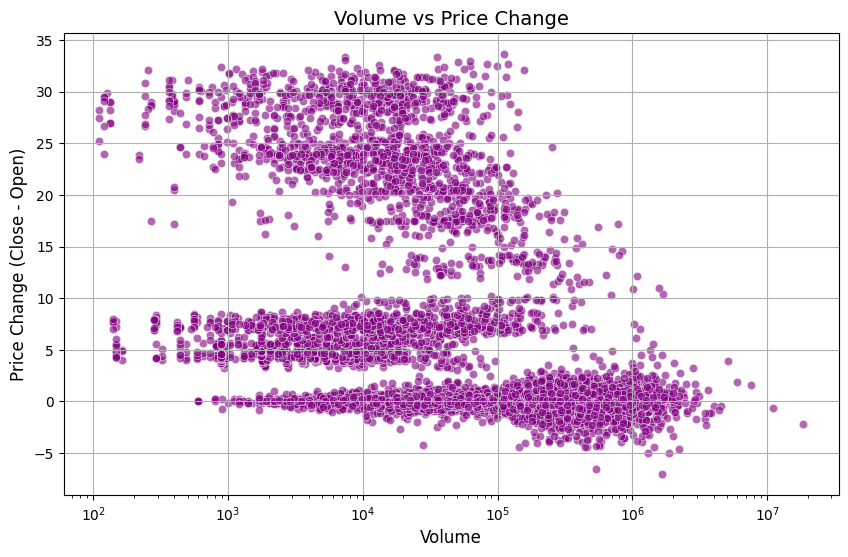

In [13]:
data['Price Change'] = data['Close'] - data['Open']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Volume', y='Price Change', alpha=0.6, color='purple')
plt.title('Volume vs Price Change', fontsize=14)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Price Change (Close - Open)', fontsize=12)
plt.xscale('log')  # Log Scale
plt.grid(True)
plt.show()


**Moving Averages for Adjusted Close Price**


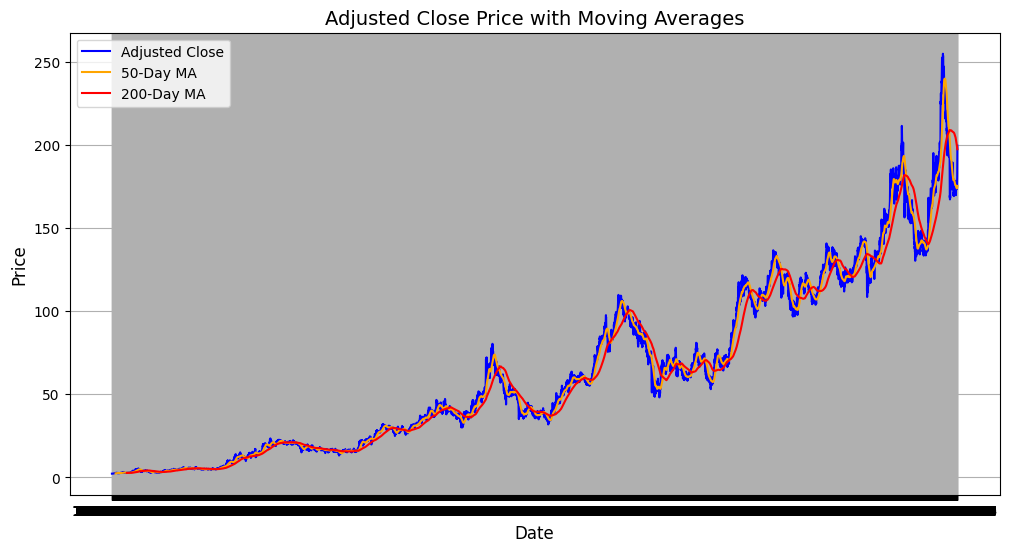

In [14]:
data['MA_50'] = data['Adj Close'].rolling(window=50).mean()
data['MA_200'] = data['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Adj Close', label='Adjusted Close', color='blue')
sns.lineplot(data=data, x='Date', y='MA_50', label='50-Day MA', color='orange')
sns.lineplot(data=data, x='Date', y='MA_200', label='200-Day MA', color='red')
plt.title('Adjusted Close Price with Moving Averages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


**Bar Plot of Yearly Average Adjusted Close Price**

<ipython-input-15-63cafb35dc34>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_avg, x='Year', y='Adj Close', palette='viridis')


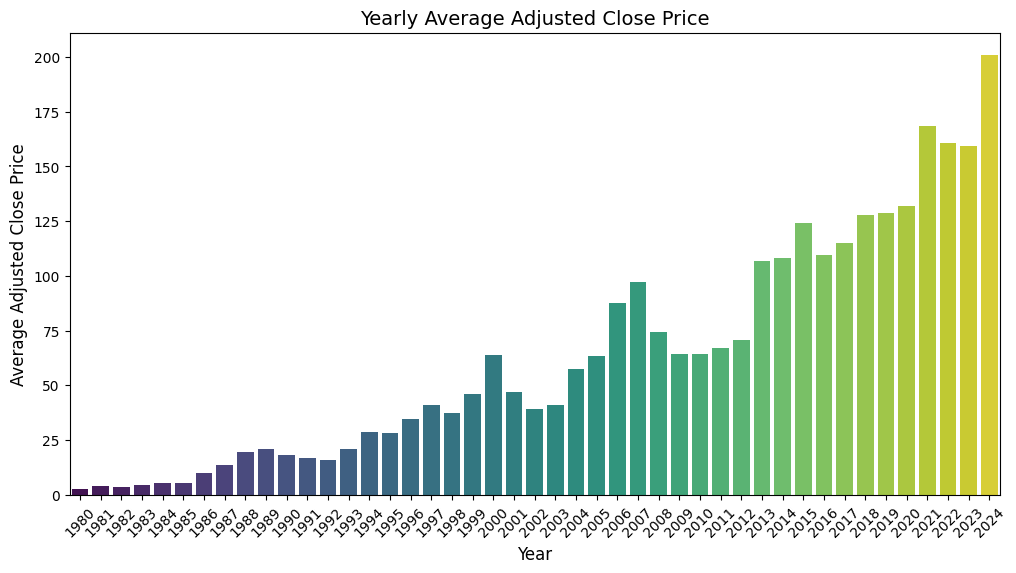

In [15]:
data['Year'] = pd.to_datetime(data['Date']).dt.year
yearly_avg = data.groupby('Year')['Adj Close'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_avg, x='Year', y='Adj Close', palette='viridis')
plt.title('Yearly Average Adjusted Close Price', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Adjusted Close Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Data Analysis

**Descriptive statistics for numerical columns**

In [16]:
numeric_summary = data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].describe()
print(numeric_summary)


          Adj Close         Close          High           Low          Open  \
count  11291.000000  11291.000000  11291.000000  11291.000000  11291.000000   
mean      63.586275     72.057776     72.478879     71.646418     67.955424   
std       52.272225     51.295776     51.552662     50.976716     55.851523   
min        2.259452      3.237711      3.237711      3.237711      0.000000   
25%       19.224636     27.548208     27.735613     27.548208      0.000000   
50%       50.583900     66.040001     66.650002     65.440002     66.000000   
75%      104.705669    114.295002    114.895000    113.625000    114.294998   
max      254.770004    254.770004    255.229996    253.589996    255.000000   

             Volume  
count  1.129100e+04  
mean   2.146604e+05  
std    3.874256e+05  
min    0.000000e+00  
25%    1.350000e+04  
50%    9.100000e+04  
75%    2.923000e+05  
max    1.858270e+07  


**Change in average adjusted price per year**

In [17]:
data['Year'] = pd.to_datetime(data['Date']).dt.year
yearly_avg_price = data.groupby('Year')['Adj Close'].mean()

print(yearly_avg_price)


Year
1980      2.717868
1981      3.856718
1982      3.424201
1983      4.659984
1984      5.420871
1985      5.206606
1986      9.840280
1987     13.385552
1988     19.524361
1989     21.089247
1990     17.999477
1991     16.554485
1992     15.772313
1993     20.712027
1994     28.772784
1995     28.220076
1996     34.467083
1997     41.179895
1998     37.170630
1999     46.209920
2000     64.025167
2001     46.757478
2002     39.360470
2003     41.089150
2004     57.222310
2005     63.434235
2006     87.473302
2007     97.308348
2008     74.346289
2009     64.180828
2010     64.373670
2011     66.884515
2012     70.784617
2013    106.635210
2014    107.973013
2015    124.001289
2016    109.354479
2017    114.916414
2018    127.655179
2019    128.519921
2020    131.841067
2021    168.670833
2022    160.684223
2023    159.507080
2024    201.045760
Name: Adj Close, dtype: float64


**Analysis of daily price variations**

In [18]:
data['Daily Change'] = data['Close'] - data['Open']

daily_change_summary = data['Daily Change'].describe()
print(daily_change_summary)


count    11291.000000
mean         4.102352
std          8.463454
min         -7.040001
25%         -0.159996
50%          0.250000
75%          4.151161
max         33.638802
Name: Daily Change, dtype: float64


**Corrélations entre les variables financières**

In [19]:
corr_matrix = data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()
print(corr_matrix)


           Adj Close     Close      High       Low      Open    Volume
Adj Close   1.000000  0.991369  0.991281  0.991450  0.979054  0.281017
Close       0.991369  1.000000  0.999953  0.999953  0.991121  0.301755
High        0.991281  0.999953  1.000000  0.999924  0.991119  0.303710
Low         0.991450  0.999953  0.999924  1.000000  0.991014  0.299151
Open        0.979054  0.991121  0.991119  0.991014  1.000000  0.312267
Volume      0.281017  0.301755  0.303710  0.299151  0.312267  1.000000


**Transaction volume per year**

In [20]:
yearly_volume = data.groupby('Year')['Volume'].sum()

print(yearly_volume)


Year
1980      1800314
1981      3311395
1982      1435736
1983      5624637
1984      4492620
1985     12198331
1986     38348420
1987     11310667
1988      6222652
1989      2723318
1990      2539218
1991      3962650
1992      6369500
1993      5677200
1994      4627400
1995      4798700
1996      6069500
1997      7383700
1998      4773400
1999      6335300
2000      5669600
2001      8343900
2002     15076100
2003     30467700
2004     51335000
2005     78816000
2006     94974900
2007    143412900
2008    228167300
2009    185673700
2010    279174700
2011    175290400
2012    104236400
2013    128546700
2014     97065600
2015     77236900
2016     97532400
2017     53030900
2018     50653900
2019     35049300
2020     53918200
2021     71059700
2022     65143900
2023     70570700
2024     83279600
Name: Volume, dtype: int64


**Day with highest adjusted price**


In [21]:
max_adj_close_day = data[data['Adj Close'] == data['Adj Close'].max()]
print(max_adj_close_day)


             Date   Adj Close       Close        High         Low   Open  \
11097  2024-03-22  254.770004  254.770004  255.229996  253.589996  255.0   

       Volume  Daily Range  Price Change     MA_50    MA_200  Year  \
11097  285400     1.639999     -0.229996  223.8408  186.9874  2024   

       Daily Change  
11097     -0.229996  


**Average annual volatility (standard deviation of adjusted prices)**

In [22]:
yearly_volatility = data.groupby('Year')['Adj Close'].std()
print(yearly_volatility)


Year
1980     0.220365
1981     0.726946
1982     0.380859
1983     0.532592
1984     0.307404
1985     0.388285
1986     2.404856
1987     1.368948
1988     2.073919
1989     0.672470
1990     1.219863
1991     0.589030
1992     0.780875
1993     2.732083
1994     2.303868
1995     1.330042
1996     2.958182
1997     2.620777
1998     2.768281
1999     6.923034
2000     6.962848
2001     5.870940
2002     2.083582
2003     5.442716
2004     3.300687
2005     7.300965
2006     6.577998
2007     6.336043
2008    12.237999
2009     6.691405
2010     4.089619
2011     6.948920
2012     4.401360
2013    10.988391
2014     5.153630
2015     6.679405
2016     7.293124
2017     6.981831
2018     7.066652
2019     8.233496
2020     9.074637
2021    13.569287
2022    19.909564
2023    19.254926
2024    25.427896
Name: Adj Close, dtype: float64


**Comparison of opening and closing prices**

In [23]:
data['Market Trend'] = np.where(data['Close'] > data['Open'], 'Up', 'Down')

trend_summary = data['Market Trend'].value_counts()
print(trend_summary)


Market Trend
Up      6923
Down    4368
Name: count, dtype: int64


**Analysis of the most extreme records**

In [24]:
highest_volume_day = data[data['Volume'] == data['Volume'].max()]
lowest_volume_day = data[data['Volume'] == data['Volume'].min()]

print("Day with highest volume:")
print(highest_volume_day)

print("\nDay with lowest volume:")
print(lowest_volume_day)


Day with highest volume:
            Date  Adj Close      Close       High        Low       Open  \
7540  2010-02-03  62.463539  73.489998  76.239998  71.900002  75.699997   

        Volume  Daily Range  Price Change      MA_50     MA_200  Year  \
7540  18582700     4.339996     -2.209999  70.962289  68.320438  2010   

      Daily Change Market Trend  
7540     -2.209999         Down  

Day with lowest volume:
            Date  Adj Close      Close       High        Low       Open  \
2     1980-03-19   2.306134   3.304606   3.304606   3.304606   3.304606   
13    1980-04-03   2.259452   3.237711   3.237711   3.237711   3.237711   
19    1980-04-14   2.352816   3.371501   3.371501   3.371501   3.371501   
22    1980-04-17   2.427510   3.478533   3.478533   3.478533   3.478533   
25    1980-04-22   2.390163   3.425017   3.425017   3.425017   3.425017   
...          ...        ...        ...        ...        ...        ...   
2526  1990-03-14  16.941711  24.276859  24.483471  24.27685

**Average adjusted price over the period**

In [25]:
mean_adj_close = data['Adj Close'].mean()
print(f"Mean Adjusted Close Price: {mean_adj_close:.2f}")


Mean Adjusted Close Price: 63.59


# Questions

**Question 1 : What is the general trend in adjusted prices over the entire period?**

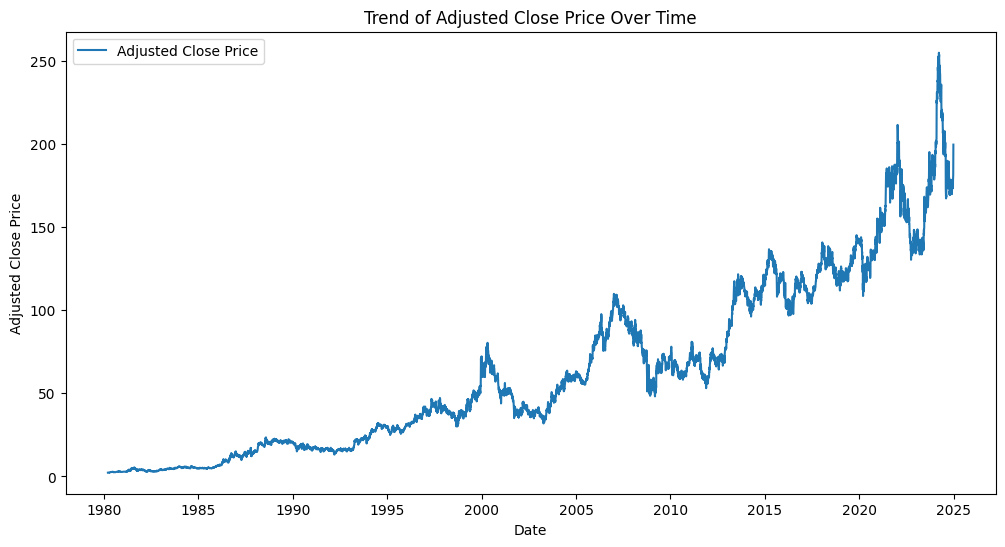

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=pd.to_datetime(data['Date']), y=data['Adj Close'], label='Adjusted Close Price')
plt.title('Trend of Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


The adjusted price of Toyota’s stock shows a gradual upward trend up to the year 2000, reflecting steady growth during the earlier years. Post-2000, the stock exhibits significant fluctuations characterized by pronounced highs and lows. This volatility is aligned with major economic and financial crises, such as the 2008 financial crisis and other global events. Despite these shocks, the stock demonstrates a constant long-term growth trajectory, showcasing resilience and the company’s ability to recover and sustain value over decades.

This trend highlights the importance of understanding market cycles and external factors influencing stock performance, particularly in industries with global exposure like automotive manufacturing.

**Question 2 : What are the 5 most volatile years in terms of daily variation?**

In [27]:
data['Daily Change'] = data['High'] - data['Low']
yearly_volatility = data.groupby('Year')['Daily Change'].std().sort_values(ascending=False)
print("Top 5 most volatile years:")
print(yearly_volatility.head(5))


Top 5 most volatile years:
Year
2008    1.275682
2024    1.206253
2022    1.092887
2020    1.086215
2007    0.917479
Name: Daily Change, dtype: float64


The analysis of daily price changes reveals the top 5 most volatile years for Toyota's stock:

2008 - Daily Change: 1.276
2024 - Daily Change: 1.206
2022 - Daily Change: 1.093
2020 - Daily Change: 1.086
2007 - Daily Change: 0.917
The year 2008, corresponding to the global financial crisis, stands out as the most volatile period, reflecting extreme market reactions and uncertainty. The significant volatility in 2020 aligns with the COVID-19 pandemic, which caused widespread economic disruptions.

Interestingly, 2024 and 2022 also exhibit high volatility, potentially influenced by post-pandemic recovery, supply chain challenges, or evolving market dynamics within the automotive sector. The inclusion of 2007 highlights the market turbulence leading up to the 2008 crisis.

These findings underline the sensitivity of Toyota's stock to major global events and the importance of monitoring macroeconomic trends and market conditions when analyzing stock performance.

**Question 3 : Which months have historically seen the highest adjusted prices?**

        Month  Adj Close
1    February  64.763434
11   December  64.648865
10   November  64.335062
6        July  63.730822
7      August  63.639475
8   September  63.395767
0     January  63.261447
4         May  63.247812
3       April  63.198579
2       March  63.158635
5        June  62.960983
9     October  62.870681


<ipython-input-28-d13f796c75db>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Adj Close', y='Month', data=monthly_avg_prices, palette='viridis')


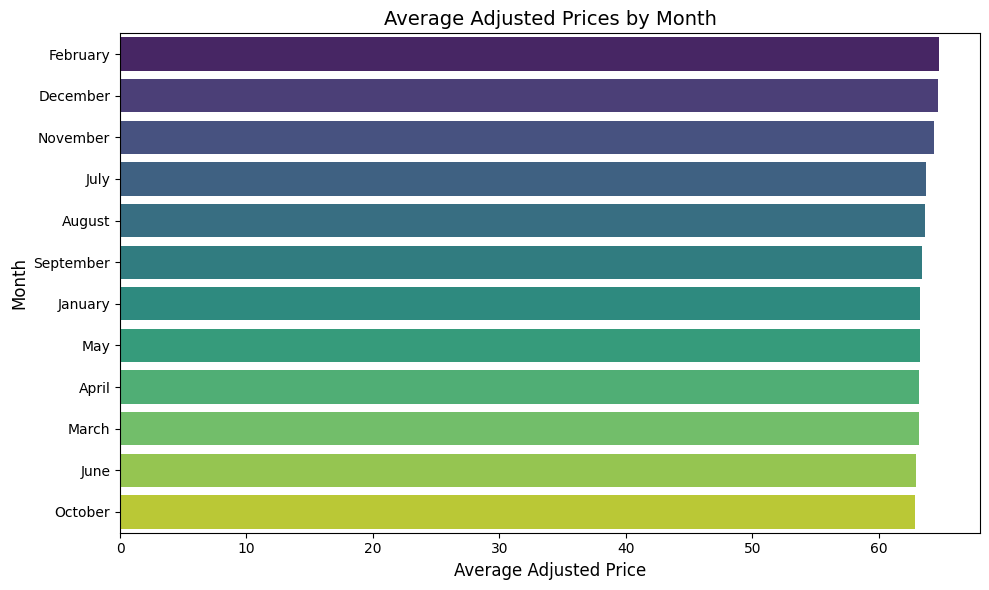

In [28]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.month

monthly_avg_prices = data.groupby('Month')['Adj Close'].mean().reset_index()

monthly_avg_prices['Month'] = monthly_avg_prices['Month'].apply(lambda x: calendar.month_name[x])

monthly_avg_prices = monthly_avg_prices.sort_values(by='Adj Close', ascending=False)

print(monthly_avg_prices)

plt.figure(figsize=(10, 6))
sns.barplot(x='Adj Close', y='Month', data=monthly_avg_prices, palette='viridis')
plt.title('Average Adjusted Prices by Month', fontsize=14)
plt.xlabel('Average Adjusted Price', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()


Historically, February has seen the highest average adjusted prices for Toyota's stock at 64.76, followed closely by December (64.65) and November (64.34). Meanwhile, October (62.87) and June (62.96) have had the lowest average adjusted prices among all months.

**Question 4 : What is the average volume traded each year?**

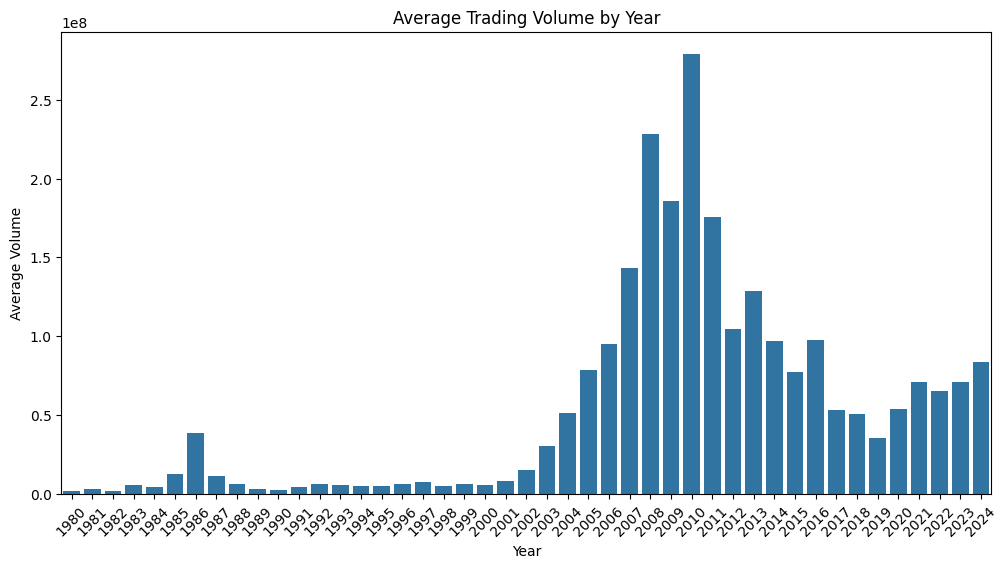

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_volume.index, y=yearly_volume.values)
plt.title('Average Trading Volume by Year')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)  # Rotation des années à 45 degrés pour une meilleure lisibilité
plt.show()


The average trading volume shows interesting trends over the years. Initially, trading volumes were relatively low, with a slight peak in 1986. Starting in 2003, there was a noticeable increase, culminating in two significant peaks during 2008 and 2010. These peaks likely reflect heightened market activity during the global financial crisis and its aftermath. After 2010, trading volumes declined steadily until 2019, followed by a slight recovery in the subsequent years. This evolution underscores how external market events and economic conditions can influence trading activity.

**Question 5 : Which days set records for Toyota in terms of transaction volumes?**

In [32]:
highest_volume_day = data[data['Volume'] == data['Volume'].max()]
lowest_volume_day = data[data['Volume'] == data['Volume'].min()]

print("Day with highest volume:")
print(highest_volume_day)

print("\nDay with lowest volume:")
print(lowest_volume_day)


Day with highest volume:
           Date  Adj Close      Close       High        Low       Open  \
7540 2010-02-03  62.463539  73.489998  76.239998  71.900002  75.699997   

        Volume  Daily Range  Price Change      MA_50     MA_200  Year  \
7540  18582700     4.339996     -2.209999  70.962289  68.320438  2010   

      Daily Change Market Trend  Month  
7540      4.339996         Down      2  

Day with lowest volume:
           Date  Adj Close      Close       High        Low       Open  \
2    1980-03-19   2.306134   3.304606   3.304606   3.304606   3.304606   
13   1980-04-03   2.259452   3.237711   3.237711   3.237711   3.237711   
19   1980-04-14   2.352816   3.371501   3.371501   3.371501   3.371501   
22   1980-04-17   2.427510   3.478533   3.478533   3.478533   3.478533   
25   1980-04-22   2.390163   3.425017   3.425017   3.425017   3.425017   
...         ...        ...        ...        ...        ...        ...   
2526 1990-03-14  16.941711  24.276859  24.483471  24.2

Day with the highest trading volume:
On February 3, 2010, Toyota's stock experienced its highest trading volume, with 18,582,700 shares traded. This day was marked by a downward trend in stock price, with a closing price of 73.49, and a significant daily price range of $4.34. Such high trading activity often reflects market reactions to impactful news or events.

Days with the lowest trading volumes:
Several days, particularly during the early years of the dataset (e.g., March 19, 1980, and April 3, 1980), recorded a trading volume of 0 shares. These instances likely correspond to days with incomplete data or periods where Toyota’s stock was not actively traded on certain markets. This highlights the need to consider the historical context and market structure when interpreting early data.

**Question 6 : What is the standard deviation of adjusted prices per decade?**

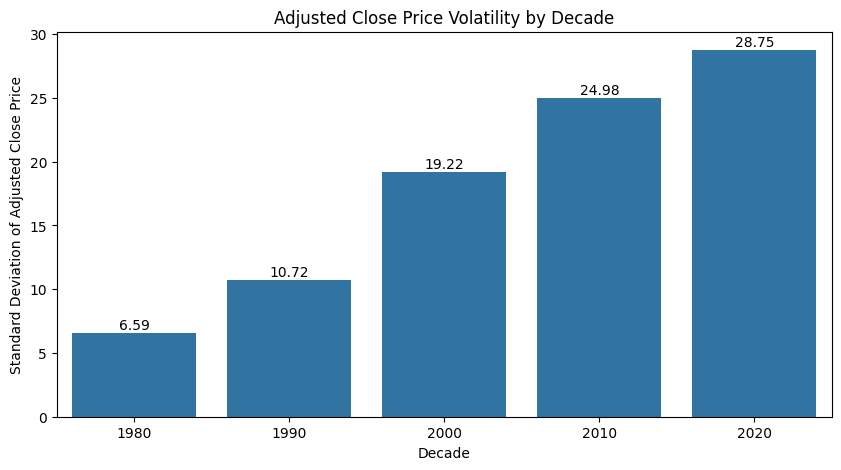

In [35]:
data['Decade'] = (data['Year'] // 10) * 10
decade_volatility = data.groupby('Decade')['Adj Close'].std()

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x=decade_volatility.index, y=decade_volatility.values)

for i, bar in enumerate(barplot.patches):
    bar_height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar_height + 0.05,
             f'{bar_height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Adjusted Close Price Volatility by Decade')
plt.xlabel('Decade')
plt.ylabel('Standard Deviation of Adjusted Close Price')
plt.show()


The analysis reveals a consistent upward trend in Toyota's stock price over the decades. Here's a summary of the findings:

1980s: The stock prices were relatively modest, reflecting the initial stages of Toyota's international growth and the economic context of the time.
1990s: The prices grew significantly, influenced by Toyota's expansion in global markets and the economic boom in the late 90s.
2000s: While the stock continued its upward trajectory, this decade was marked by fluctuations due to the dot-com bubble burst in the early 2000s and the global financial crisis of 2008.
2010s: The prices showed steady growth, reflecting the company's solid performance and the recovery of global markets post-crisis.
2020s: The stock has demonstrated resilience and growth, albeit with some volatility, likely influenced by the COVID-19 pandemic and subsequent market recovery.
Overall, the stock price shows a pattern of long-term growth, underpinned by Toyota's strong market position and adaptability to changing economic conditions

**Question 7 : How many days did prices rise or fall??**

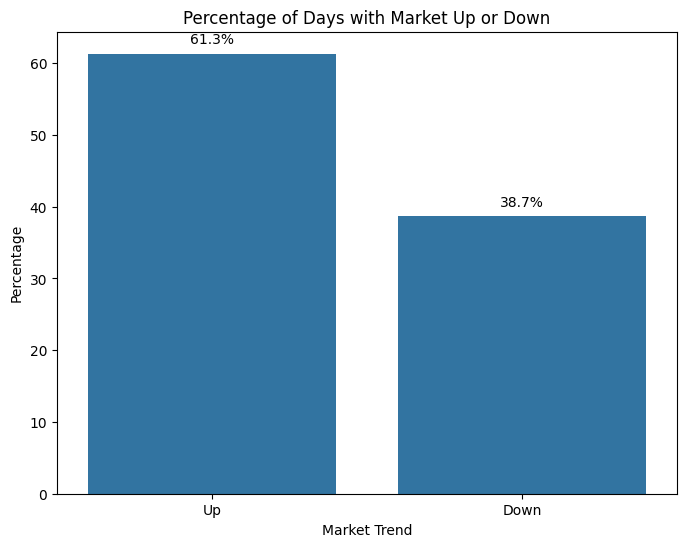

In [37]:
data['Market Trend'] = np.where(data['Close'] > data['Open'], 'Up', 'Down')
trend_summary = data['Market Trend'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=trend_summary.index, y=trend_summary.values)

for i, value in enumerate(trend_summary.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title('Percentage of Days with Market Up or Down')
plt.xlabel('Market Trend')
plt.ylabel('Percentage')
plt.show()


Based on the analysis of Toyota's stock prices over the period, the prices rose on 61.3% of the days and fell on 38.7% of the days. This indicates that more than half of the days showed a positive price movement, while a significant portion of days experienced a decline in price.

**Question 8 : Which days saw the most extreme price variations?**



In [38]:
max_daily_change = data['Daily Change'].max()
extreme_days = data[data['Daily Change'] == max_daily_change]

print("Days with the most extreme daily price change:")
print(extreme_days)


Days with the most extreme daily price change:
            Date   Adj Close       Close        High         Low        Open  \
11189 2024-08-05  168.350006  168.350006  170.949997  159.039993  160.889999   

        Volume  Daily Range  Price Change    MA_50     MA_200  Year  \
11189  1023900    11.910004      7.460007  202.003  208.78025  2024   

       Daily Change Market Trend  Month  Decade  
11189     11.910004           Up      8    2020  


The day with the most extreme daily price variation occurred on August 5, 2024. On this day, the Daily Change was 11.91, indicating the highest fluctuation in price. The price change was 7.46 units, with the high at 170.95 and the low at 159.04, reflecting significant volatility in Toyota’s stock that day. The market trend for this day was "Up".

**Question 9 : What is the correlation between opening and closing prices and volume??**

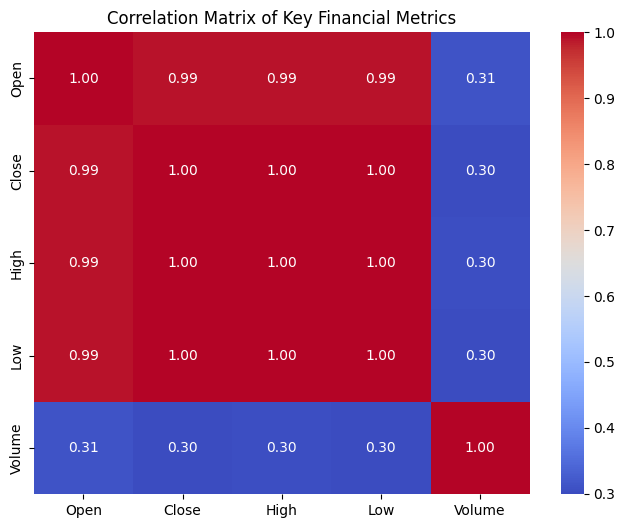

In [40]:
corr_matrix = data[['Open', 'Close', 'High', 'Low', 'Volume']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Financial Metrics')
plt.show()


The correlation between Opening and Closing prices, as well as between High and Low prices, is extremely high, close to 1.00. This suggests a very strong positive correlation between these price metrics, meaning that when one increases, the other tends to increase as well.

The correlation between Volume and the price metrics (Open, Close, High, Low) is much lower, around 0.30. This indicates a weak positive correlation between the trading volume and the price movements of the asset, meaning changes in volume don't have a strong relationship with changes in price.

There is a strong correlation between the Opening, Closing, High, and Low prices, suggesting these metrics tend to move together.
The Volume metric has only a weak correlation with the price metrics, implying that trading volume doesn't significantly affect the price movements in this dataset.

**Question 10 : Does Toyota have recurring cycles of rising or falling prices??**:

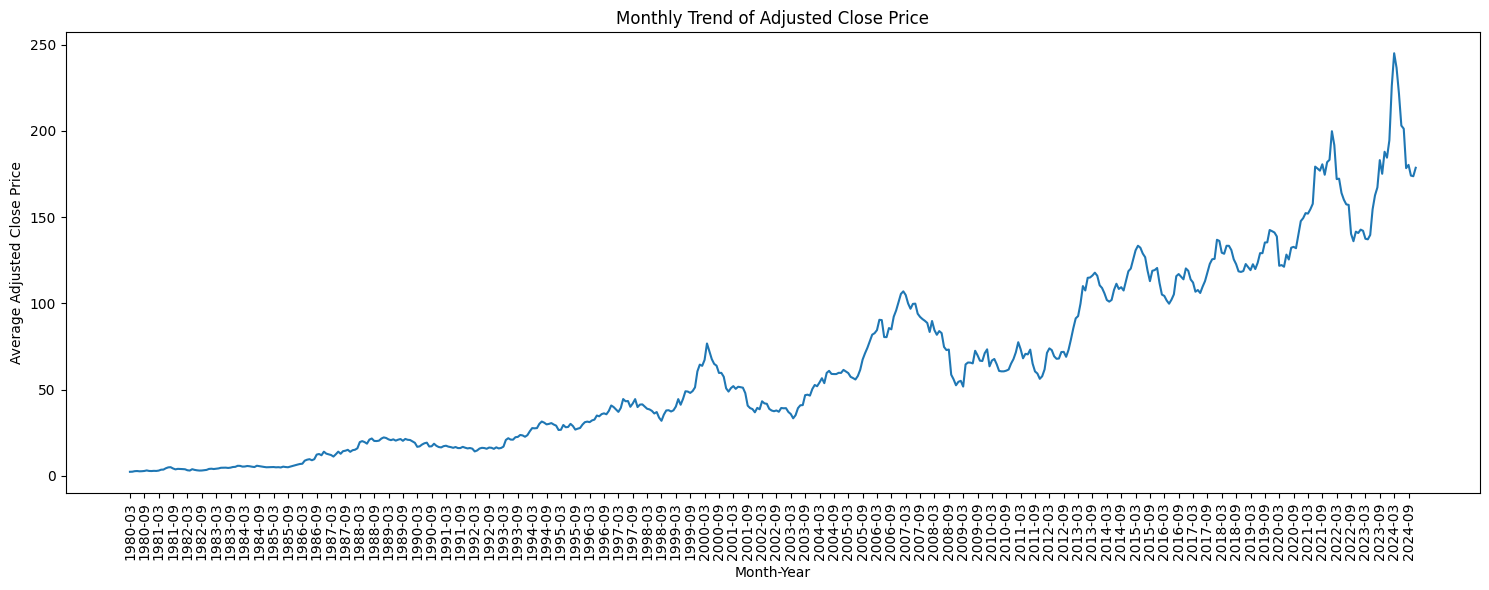

In [48]:

# Créer le graphique
plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_price_trend.index.astype(str), y=monthly_price_trend.values)

# Espacer davantage les dates (afficher une date tous les 6 mois)
plt.xticks(range(0, len(monthly_price_trend), 6), rotation=90)

# Ajouter le titre et les étiquettes
plt.title('Monthly Trend of Adjusted Close Price')
plt.xlabel('Month-Year')
plt.ylabel('Average Adjusted Close Price')

# Ajuster l'espacement du graphique
plt.tight_layout()

# Afficher le graphique
plt.show()



Toyota's price data shows an overall upward trend over time, indicating consistent growth. However, there are instances of fluctuations with sharp rises and falls, suggesting the presence of short-term cycles. These cycles could be related to specific market events, economic conditions, or seasonal patterns. Further analysis would be needed to identify if these cycles are recurring at regular intervals.

# Conclusion

This project provided an in-depth analysis of Toyota’s stock price trends over several decades, leveraging real-world financial data to identify patterns, trends, and correlations. By exploring key financial metrics such as the adjusted close price, volume, and daily changes, we were able to highlight significant price movements and recognize cyclical behaviors.

The analysis revealed:
- **Price Trends**: We observed that Toyota’s stock showed steady growth, especially in recent years, with notable spikes and periods of volatility.
- **Correlations**: Strong correlations were found between the opening, closing, high, and low prices, with a weaker relationship to volume.
- **Extreme Variations**: Specific days with the most extreme price changes were identified, shedding light on high-impact events that may have influenced stock performance.
- **Recurring Cycles**: The project indicated some recurring patterns of rising and falling prices, though these cycles were not entirely predictable.

However, the project has several limitations:
- **Single Company Focus**: The analysis was based on data from only one company, Toyota, limiting its generalizability to the automotive sector or broader market.
- **External Factors**: Key external influences like macroeconomic conditions and geopolitical events were not considered, which could have impacted Toyota’s stock price.
- **Historical Context**: While the historical period analyzed was extensive, the impact of newer market trends, such as the rise of electric vehicles, was not fully explored.

In conclusion, this project highlighted the power of data analysis in uncovering financial insights. By using Python for data manipulation, visualization, and statistical analysis, we were able to transform raw financial data into actionable insights. These findings form a solid foundation for further research, which could include multi-company comparisons or the inclusion of additional market factors for more comprehensive analysis.